In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw

In [3]:
kz_path = '/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_KZ_2019-12-02.nc'

In [5]:
RK1 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/RK1_1m_t300.nc')
RK4 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/RK4_1m_t300.nc')

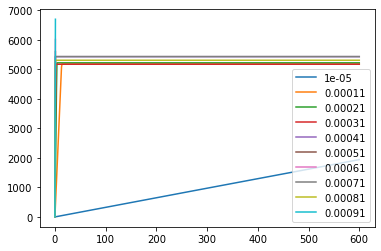

In [28]:
for i in range(0, 100, 10):
    plt.plot(RK1['z'][i,:], label=RK1['alpha'][i,0].values)
# plt.plot(-RK4['z'][0,:])
plt.legend()

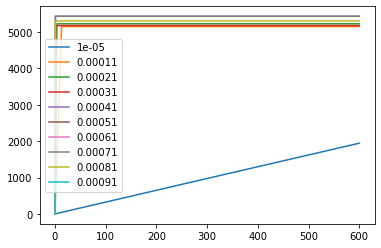

In [29]:
for i in range(0, 100, 10):
    plt.plot(RK4['z'][i,:], label=RK4['alpha'][i,0].values)
# plt.plot(-RK4['z'][0,:])
plt.legend()

In [22]:
RK1['alpha']

<xarray.DataArray 'alpha' (traj: 100, obs: 601)>
array([[1.0e-05, 1.0e-05, 1.0e-05, ..., 1.0e-05, 1.0e-05, 1.0e-05],
       [2.0e-05, 2.0e-05, 2.0e-05, ..., 2.0e-05, 2.0e-05, 2.0e-05],
       [3.0e-05, 3.0e-05, 3.0e-05, ..., 3.0e-05, 3.0e-05, 3.0e-05],
       ...,
       [9.8e-04, 9.8e-04, 9.8e-04, ..., 9.8e-04, 9.8e-04, 9.8e-04],
       [9.9e-04, 9.9e-04, 9.9e-04, ..., 9.9e-04, 9.9e-04, 9.9e-04],
       [1.0e-03, 1.0e-03, 1.0e-03, ..., 1.0e-03, 1.0e-03, 1.0e-03]],
      dtype=float32)
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  alpha
    units:          unknown

(array([37.,  6.,  5.,  4.,  5.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([8.99664232e-04, 2.91185755e+00, 5.82281544e+00, 8.73377333e+00,
        1.16447312e+01, 1.45556891e+01, 1.74666470e+01, 2.03776049e+01,
        2.32885628e+01, 2.61995206e+01, 2.91104785e+01, 3.20214364e+01,
        3.49323943e+01, 3.78433522e+01, 4.07543101e+01, 4.36652680e+01,
        4.65762259e+01, 4.94871837e+01, 5.23981416e+01, 5.53090995e+01,
        5.82200574e+01, 6.11310153e+01, 6.40419732e+01, 6.69529311e+01,
        6.98638890e+01, 7.27748468e+01, 7.56858047e+01, 7.85967626e+01,
        8.15077205e+01, 8.44186784e+01, 8.73296363e+01]),
 <BarContainer object of 30 artists>)

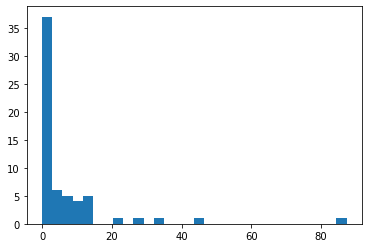

In [18]:
plt.hist(RK1['z'][:,-1] - RK4['z'][:,-1], bins=30)

In [7]:
sim60_v_s = xr.load_dataset(path + 'SA_60m_s02_t600.nc')

In [8]:
sim60_no_v_s = xr.load_dataset(path + 'SA_60m_s02_t600_no-v_s.nc')

In [9]:
sim60_no_v_s

<xarray.Dataset>
Dimensions:           (traj: 1000, obs: 601)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... 999.0 999.0 999.0
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2018...
    lat               (traj, obs) float64 -32.15 -32.22 -32.32 ... -39.09 -39.06
    lon               (traj, obs) float64 6.278 6.621 6.954 ... -2.501 -2.561
    z                 (traj, obs) float64 60.0 59.99 60.75 ... 131.1 130.0 128.9
    cons_temperature  (traj, obs) float32 0.0 18.42 17.81 ... 11.93 12.11 11.86
    abs_salinity      (traj, obs) float32 0.0 35.65 35.59 ... 34.85 34.89 34.82
    mld               (traj, obs) float32 0.0 44.68 47.69 ... 69.0 71.44 68.75
    alpha             (traj, obs) float32 1e-06 1e-06 1e-06 ... 1e-06 1e-06
    density           (traj, obs) float32 1.035e+03 1.026e+03 ... 1.026e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

Text(0, 0.5, 'Depth (m)')

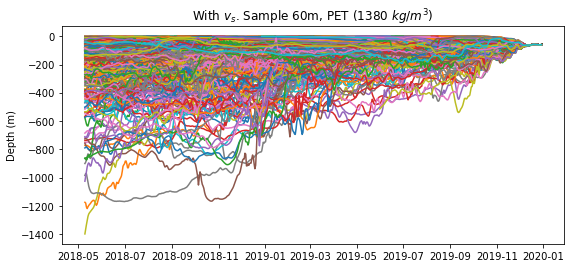

In [10]:
plt.figure(figsize=(9,4))

for i in range(1000):
    plt.plot(sim60_v_s['time'][i, 1:], -sim60_v_s['z'][i, 1:])
    
plt.title(r'With $v_s$. Sample 60m, PET (1380 $kg/m^3$)')
plt.ylabel('Depth (m)')

Text(0, 0.5, 'Depth (m)')

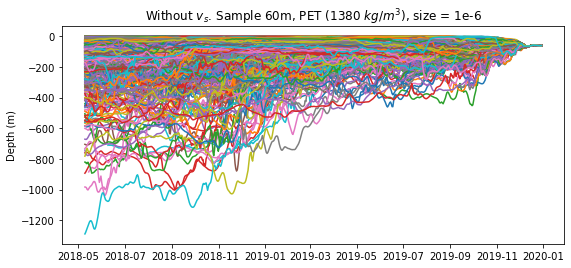

In [11]:
plt.figure(figsize=(9,4))

for i in range(1000):
    plt.plot(sim60_no_v_s['time'][i, 1:], -sim60_no_v_s['z'][i, 1:], )

plt.title(r'Without $v_s$. Sample 60m, PET (1380 $kg/m^3$), size = 1e-6')
plt.ylabel('Depth (m)')

----------

In [13]:
sim_rk4 = xr.load_dataset(path + 'RK4_5m_t10.nc')

### wrong!

In [18]:
sim_rk4['z'][}

<xarray.DataArray 'z' (traj: 100, obs: 21)>
array([[5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       ...,
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727]])
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  depth
    units:          m
    positive:       down